## Каране на скейтборд с CartPole

> **Проблем**: Ако Петър иска да избяга от вълка, той трябва да може да се движи по-бързо от него. Ще видим как Петър може да се научи да кара скейтборд, по-специално да запазва баланс, използвайки Q-Learning.

Първо, нека инсталираме gym и импортираме необходимите библиотеки:


In [1]:
#code block 1

## Създайте среда за cartpole


In [ ]:
#code block 2

За да видим как работи средата, нека изпълним кратка симулация за 100 стъпки.


In [ ]:
#code block 3

По време на симулация трябва да получаваме наблюдения, за да решим как да действаме. Всъщност, функцията `step` ни връща текущите наблюдения, функцията за награда и флага `done`, който показва дали има смисъл да продължим симулацията или не:


In [ ]:
#code block 4

Можем да получим минималната и максималната стойност на тези числа:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Нека също така изследваме друг метод за дискретизация, използвайки интервали:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Нека сега изпълним кратка симулация и наблюдаваме тези дискретни стойности на средата.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Структура на Q-таблицата


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


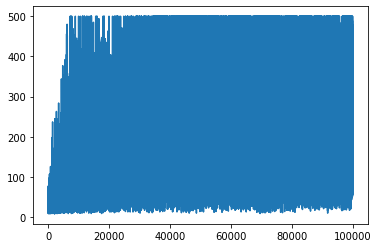

In [20]:
plt.plot(rewards)

От тази графика не може да се каже нищо, защото поради естеството на стохастичния тренировъчен процес дължината на тренировъчните сесии варира значително. За да се направи тази графика по-разбираема, можем да изчислим **плъзгаща средна стойност** върху серия от експерименти, да кажем 100. Това може да се направи удобно с помощта на `np.convolve`:


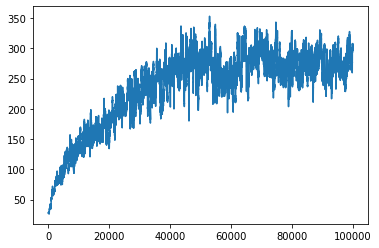

In [22]:
#code block 12

## Променливи хиперпараметри и наблюдение на резултата в действие

Сега би било интересно да видим как се държи обученият модел. Нека стартираме симулацията, като следваме същата стратегия за избор на действия, както по време на обучението: избор чрез извадка според разпределението на вероятностите в Q-таблицата:


In [23]:
# code block 13

## Запазване на резултата като анимиран GIF

Ако искате да впечатлите приятелите си, може да им изпратите анимиран GIF с изображението на балансиращия прът. За да направите това, можем да използваме `env.render`, за да създадем кадър на изображението, и след това да ги запазим като анимиран GIF с помощта на библиотеката PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматизираните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия изходен език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален превод от човек. Ние не носим отговорност за каквито и да е недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
